# **Colors of Noise**

In this notebook, we will explore the colors of noise. We will generate different types of Random Noise and combine their Power Spectral Densities along with the HSV color space to visualize their colors.

NOTE: In order for the color to be apparent in an image, it must be a very high resolution and/or the PSD needs to have a highly distinct and narrow single mode. MUlitmodal PSDs produce images that are hardly recognizable over white noise images. 
--> we can mix colors with a multimodal PSD --> We can get a mulitmodal PSD by using a "bed of nails" smoothing kernel.

NOTE: Since we are using either a column or row wise average across the 2D Power Spectral Density, the kernel should be a symmetric matrix to ensure that we get a symmestric PSD.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

set constant variables here

In [47]:
N  = 1024 # number of rows/cols
N2 = 512 # half the rows/cols

Generate White Gaussian Noise. Also generate a sample of colored/correlated noise noise by smoothing the white noise. 

- generate Red noise by applying a large smoothing to the white noise, this gives a narrow PSD at low frequencies
- generate Green noise by weighting the top left corner of a small kernel. In the PSD, this gives a linear rolloff from low to high frequencies
- generate Purple noise by using a bed of nails kernel. The particular bed of nails pattern here gives Red and Blue modes in the PSD that are combined to get purple.

In [48]:
white_noise = np.random.normal(loc=0, scale=1, size=(N, N))

In [49]:
# red noise
red_kernel = np.ones((N2, N2), dtype=np.float64)
red_kernel /= red_kernel.sum()

red_noise = cv2.filter2D(white_noise, ddepth=-1, kernel=red_kernel)
# red_noise = cv2.GaussianBlur(white_noise, ksize=(25,25), sigmaX=15) # alternate way to get red noise


In [50]:
# green noise
green_kernel = np.zeros((5,5), dtype=np.float64)
green_kernel[0:2, 0:2] = 9
green_kernel /= green_kernel.sum()

green_noise = cv2.filter2D(white_noise, ddepth=-1, kernel=green_kernel)

In [51]:
# purple noise
purple_kernel = np.zeros((N2, N2), dtype=np.float64)
purple_kernel[0::3, 0::3] = 1
purple_kernel /= purple_kernel.sum()

purple_noise = cv2.filter2D(white_noise, ddepth=-1, kernel=purple_kernel)

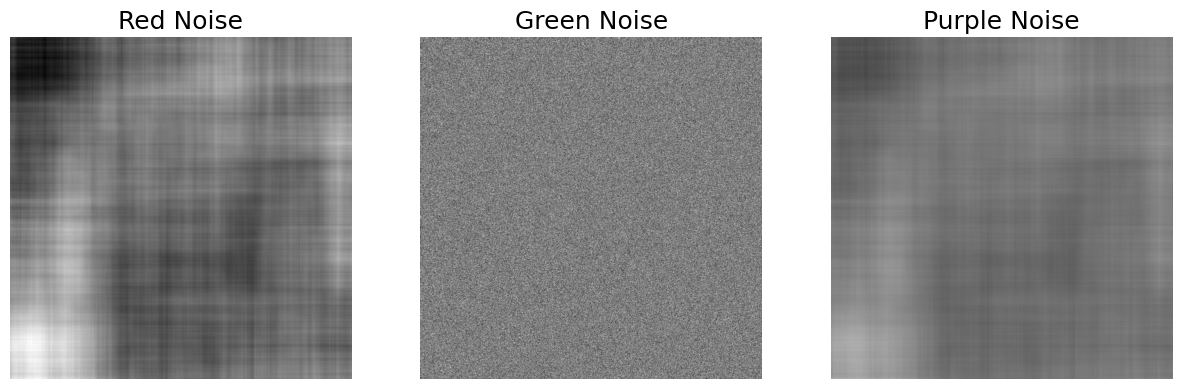

In [52]:
_, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(red_noise, cmap="gray")
ax[0].set_title('Red Noise', size=18)
ax[0].axis("off")

ax[1].imshow(green_noise, cmap="gray")
ax[1].set_title('Green Noise', size=18)
ax[1].axis("off");

ax[2].imshow(purple_noise, cmap="gray")
ax[2].set_title('Purple Noise', size=18)
ax[2].axis("off");

Compute Covariance matrices

In [53]:
Q_red = np.cov(red_noise)
Q_green = np.cov(green_noise)
Q_purple = np.cov(purple_noise)

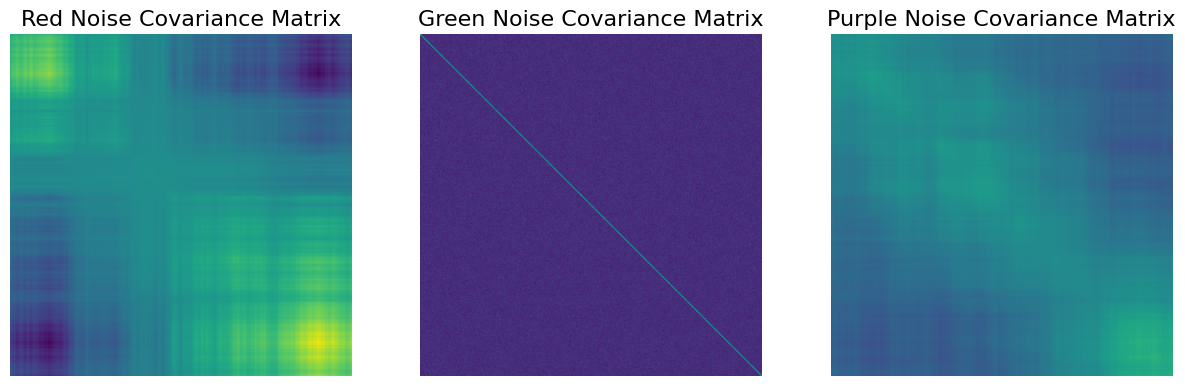

In [54]:
_, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(Q_red)
ax[0].set_title('Red Noise Covariance Matrix', size=16)
ax[0].axis("off")

ax[1].imshow(Q_green)
ax[1].set_title('Green Noise Covariance Matrix', size=16)
ax[1].axis("off");

ax[2].imshow(Q_purple)
ax[2].set_title('Purple Noise Covariance Matrix', size=16)
ax[2].axis("off");

Compute Autocorrelations

In [55]:
# compute autocorrelations
red_ac = cv2.filter2D(red_noise, ddepth=-1, kernel=red_noise)
green_ac = cv2.filter2D(green_noise, ddepth=-1, kernel=green_noise)
purple_ac = cv2.filter2D(purple_noise, ddepth=-1, kernel=purple_noise)

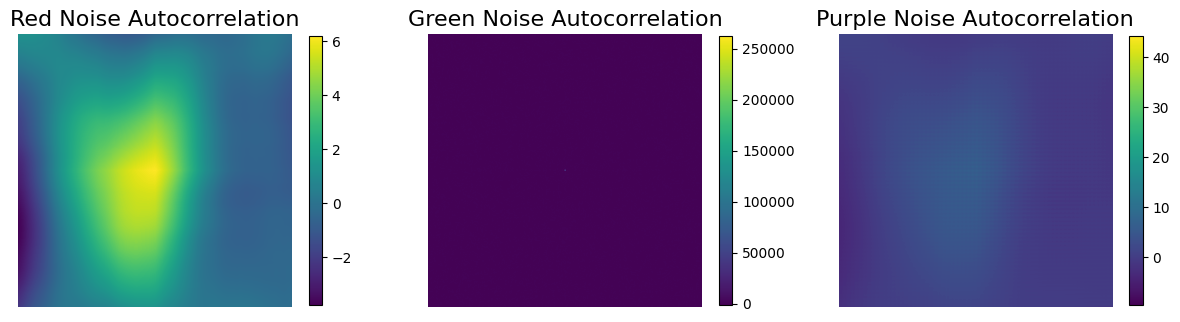

In [56]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
im0 = ax[0].imshow(red_ac)
ax[0].set_title('Red Noise Autocorrelation', size=16)
ax[0].axis("off")
plt.colorbar(im0, ax=ax[0], shrink=0.35)

im1 = ax[1].imshow(green_ac) 
ax[1].set_title('Green Noise Autocorrelation', size=16)
ax[1].axis("off")
plt.colorbar(im1, ax=ax[1], shrink=0.35);

im2 = ax[2].imshow(purple_ac)
ax[2].set_title('Purple Noise Autocorrelation', size=16)
ax[2].axis("off")
plt.colorbar(im2, ax=ax[2], shrink=0.35);

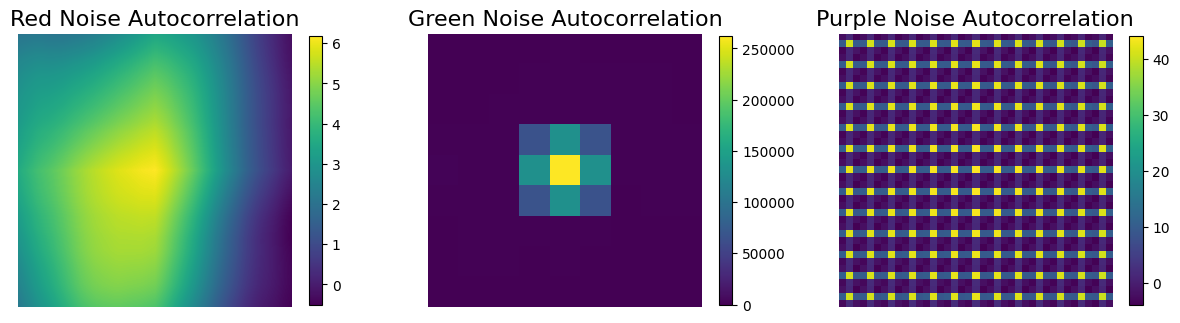

In [57]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
im0 = ax[0].imshow(red_ac[N2 - 250: N2 + 251, N2 - 250: N2 + 251])
ax[0].set_title('Red Noise Autocorrelation', size=16)
ax[0].axis("off")
plt.colorbar(im0, ax=ax[0], shrink=0.35)

im1 = ax[1].imshow(green_ac[N2 - 4: N2 + 5, N2 - 4: N2 + 5])
ax[1].set_title('Green Noise Autocorrelation', size=16)
ax[1].axis("off")
plt.colorbar(im1, ax=ax[1], shrink=0.35);

im2 = ax[2].imshow(purple_ac[N2 - 19: N2 + 20, N2 - 19: N2 + 20])
ax[2].set_title('Purple Noise Autocorrelation', size=16)
ax[2].axis("off")
plt.colorbar(im2, ax=ax[2], shrink=0.35);

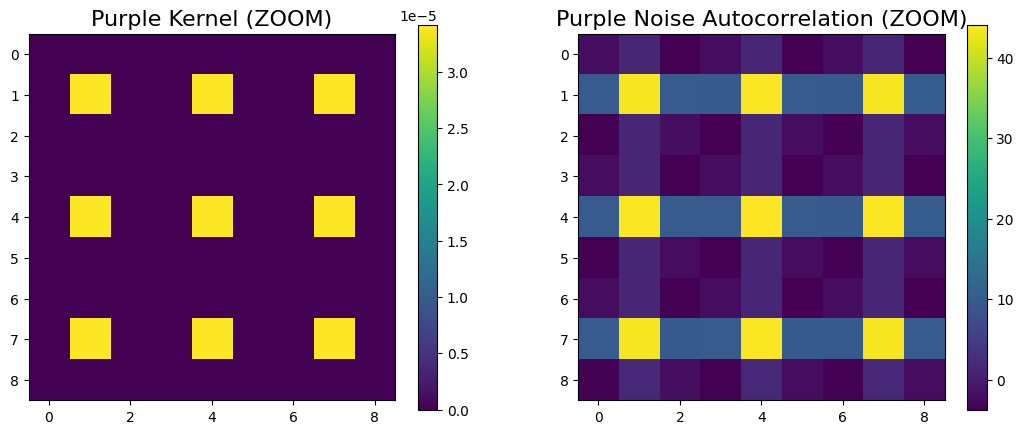

In [58]:
fig, ax = plt.subplots(1, 2, figsize=(13, 10))
im0 = ax[0].imshow(purple_kernel[2:11, 2:11])
ax[0].set_title('Purple Kernel (ZOOM)', size=16)
# ax[0].axis("off")
plt.colorbar(im0, ax=ax[0], shrink=0.5)

im1 = ax[1].imshow(purple_ac[N2 - 4: N2 + 5, N2 - 4: N2 + 5])
ax[1].set_title('Purple Noise Autocorrelation (ZOOM)', size=16)
# ax[1].axis("off")
plt.colorbar(im1, ax=ax[1], shrink=0.5);

Now get the Power Spectral Densities (PSD) of the Noise. The PSD is the Fourier Transform of the autocorrelation of the noise.

In [59]:
# compute PSDs
red_psd = np.abs(np.fft.fftshift(np.fft.fft2(red_ac)))
green_psd = np.abs(np.fft.fftshift(np.fft.fft2(green_ac)))
purple_psd = np.abs(np.fft.fftshift(np.fft.fft2(purple_ac)))

Display the PSDs. We will manually add the spatial frequencies to the axis tick labels.

C:\Users\itber\AppData\Local\Temp\ipykernel_29800\177137693.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels([0,-500, -300, -100, 100, 300, 500]);
C:\Users\itber\AppData\Local\Temp\ipykernel_29800\177137693.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_yticklabels([0,-500, -300, -100, 100, 300, 500]);
C:\Users\itber\AppData\Local\Temp\ipykernel_29800\177137693.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels([0,-500, -300, -100, 100, 300, 500]);
C:\Users\itber\AppData\Local\Temp\ipykernel_29800\177137693.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels([0,-500, -300, -100, 100, 300, 500]);
C:\Users\itber\AppData\Local\Temp\ipykernel_29800\177137693.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels([0,-500, -300, -100,

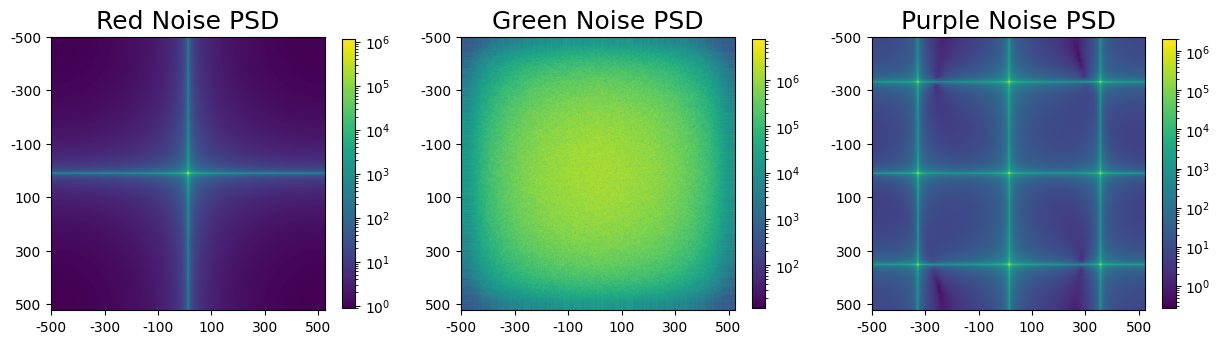

In [60]:
from matplotlib import colors

fig, ax = plt.subplots(1, 3, figsize=(15, 10))
im0 = ax[0].imshow(red_psd, norm=colors.LogNorm())
ax[0].set_title('Red Noise PSD', size=18)
ax[0].set_xticklabels([0,-500, -300, -100, 100, 300, 500]);
ax[0].set_yticklabels([0,-500, -300, -100, 100, 300, 500]);
plt.colorbar(im0, ax=ax[0], shrink=0.35)

im1 = ax[1].imshow(green_psd, norm=colors.LogNorm())
ax[1].set_title('Green Noise PSD', size=18)
ax[1].set_xticklabels([0,-500, -300, -100, 100, 300, 500]);
ax[1].set_yticklabels([0,-500, -300, -100, 100, 300, 500]);
plt.colorbar(im1, ax=ax[1], shrink=0.35);

im2 = ax[2].imshow(purple_psd, norm=colors.LogNorm())
ax[2].set_title('Purple Noise PSD', size=18)
ax[2].set_xticklabels([0,-500, -300, -100, 100, 300, 500]);
ax[2].set_yticklabels([0,-500, -300, -100, 100, 300, 500]);
plt.colorbar(im2, ax=ax[2], shrink=0.35);

Text(0.5, 0, 'Frequency')

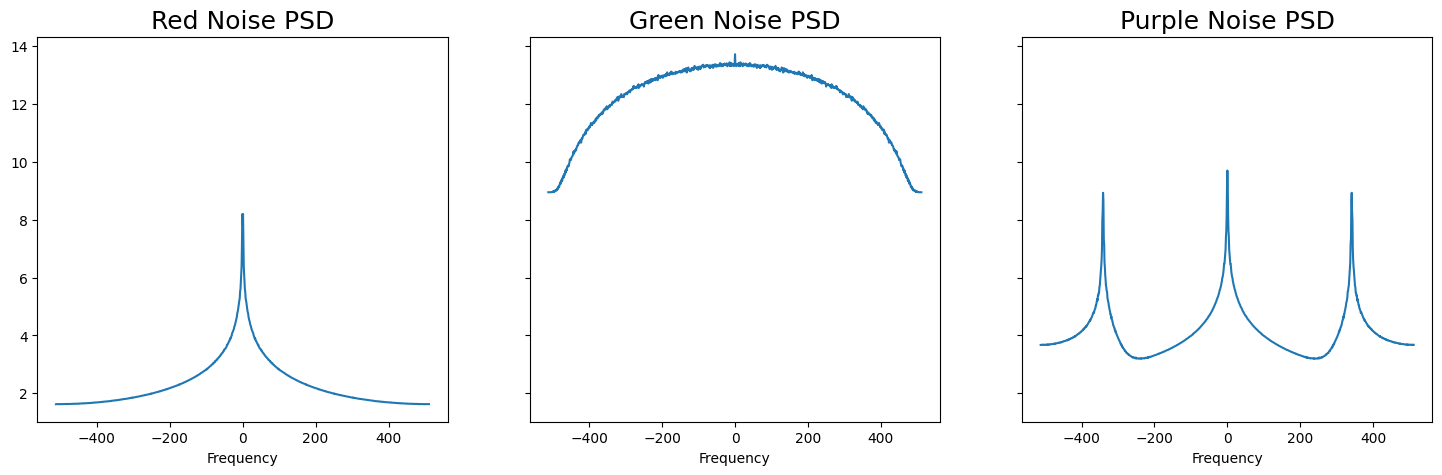

In [61]:
# axis = 0 --> average rows along each column, frequency is the horizontal frequency
# axis = 1 --> average columns along each row, frequency is the vertical frequency

_, ax = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
ax[0].plot(np.arange(-N2, N2), np.log(red_psd.mean(axis=0)))
ax[0].set_title('Red Noise PSD', size=18)
ax[0].set_xlabel("Frequency")

ax[1].plot(np.arange(-N2, N2), np.log(green_psd.mean(axis=0)))
ax[1].set_title('Green Noise PSD', size=18);
ax[1].set_xlabel("Frequency")

ax[2].plot(np.arange(-N2, N2), np.log(purple_psd.mean(axis=0)))
ax[2].set_title('Purple Noise PSD', size=18);
ax[2].set_xlabel("Frequency")

Now let's use the HSV color space to sample colors from each PSD. The HSV color space is comprised of 3 different components, the Hue, Saturation, and Value.

- **Hue** - Defines the color (ranges from either 0-360 degrees)
- **Saturation** - Describes the amount of Gray in a particular Color (0 - Gray, 1 - Pure Primary Color)
- **Value** - Describes Brightness or Intensity of a color, 0 - Black, 1 - Brightest.


We will convert each of the sampled intensities to the Hue

First get probabilities of which to sample from. This will be estimated from the 1D slices of our Power Spectral Densities. From now on, we will use PSD and Spectral Density Interchaneably

In [62]:
# red noise probability
red_probs = red_psd.mean(axis=0)
red_probs /= red_probs.sum()

# green noise probability
green_probs = green_psd.mean(axis=0)
green_probs /= green_probs.sum()

# purple noise probability
purple_probs = purple_psd.mean(axis=0)
purple_probs /= purple_probs.sum()

Next we can sample a 1D vector from our Distribution by using np.choice(). Since our Probability Distribution has N values, we will sample N unique values ranging from 0-1.

In [63]:
# get a large sample to illustrate orginal Distribution
sampled_red = np.random.choice(a=np.linspace(-360, 360, N), size=(1000000,), p=red_probs)
sampled_green = np.random.choice(a=np.linspace(-360, 360, N), size=(1000000,), p=green_probs)
sampled_purple = np.random.choice(a=np.linspace(-360, 360, N), size=(1000000,), p=purple_probs)

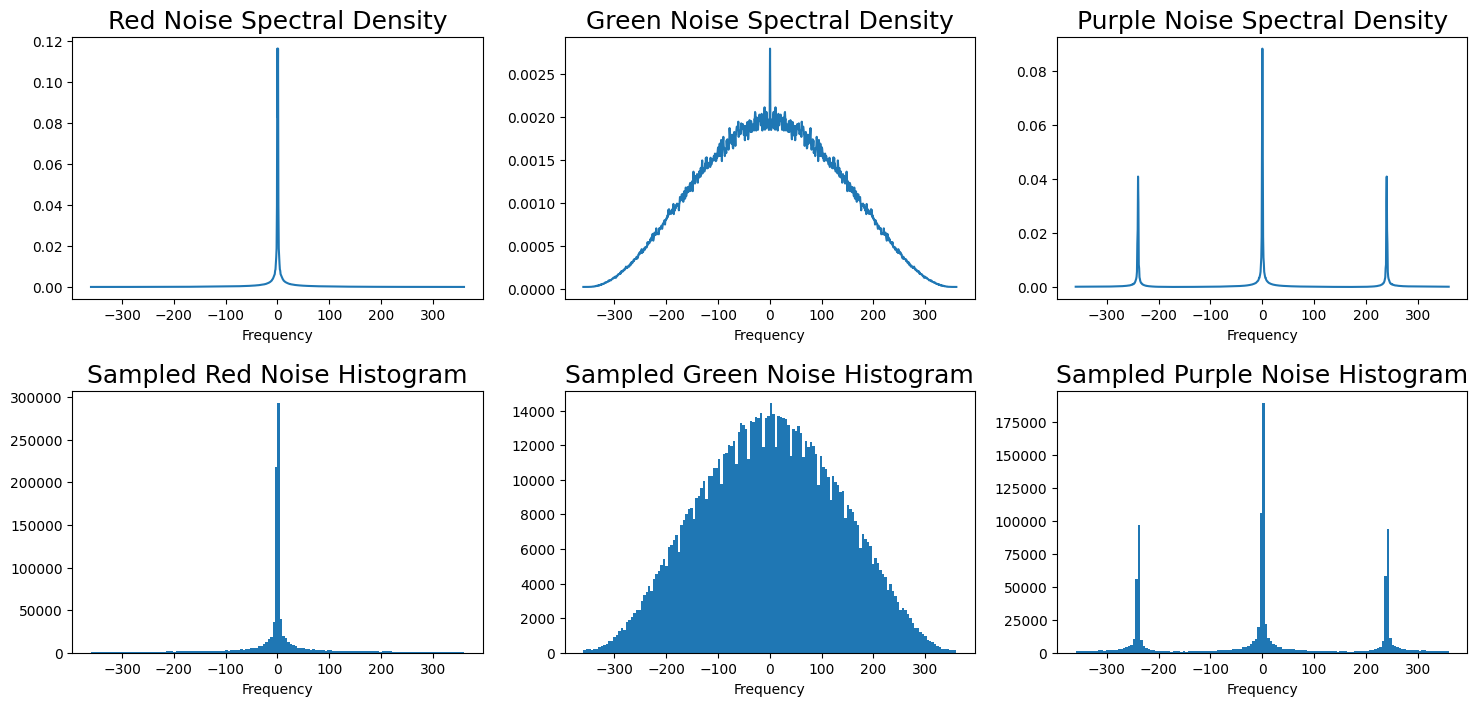

In [128]:
fig, ax = plt.subplots(2, 3, figsize=(18, 8))

probs = [red_probs, green_probs, purple_probs]
samples = [sampled_red, sampled_green, sampled_purple]
colors = ['Red', 'Green', 'Purple']

for i in range(3):
    ax[0][i].plot(np.linspace(-360, 360, N), probs[i])
    ax[0][i].set_title(f"{colors[i]} Noise Spectral Density", size=18)
    ax[0][i].set_xlabel("Frequency")

    ax[1][i].hist(samples[i], bins=150, density=False)
    ax[1][i].set_title(f"Sampled {colors[i]} Noise Histogram", size=18);
    ax[1][i].set_xlabel("Frequency")


fig.subplots_adjust(hspace=0.35);

Sample a 3 Dimensional Color image. Intensities will be the Hue value. 


In order to properly sample the Color Spectrum, we will only sample the positive half of our Distribution (i.e. Single Sided Power Spectral Density). Let's resample and plot the Single Sided Densities and histograms

In [65]:
# red noise probability
half_red_probs = red_psd.mean(axis=0)[N2:]
half_red_probs /= half_red_probs.sum()

# green noise probability
half_green_probs = green_psd.mean(axis=0)[N2:]
half_green_probs /= half_green_probs.sum()

# purple noise probability
half_purple_probs = purple_psd.mean(axis=0)[N2:]
half_purple_probs /= half_purple_probs.sum()

We will now sample the (N,N) image arrays

In [72]:
# we can use the default uniform Distribution of white noise, since it is uniform in Power over all Frequencies
# sampled_white_image = np.random.choice(a=np.linspace(0, 1, N2), size=(N, N)) # white noise --> just a mix of all colors

sampled_red_image = np.random.choice(a=np.linspace(0, 1, N2), size=(N, N), p=half_red_probs)
sampled_green_image = np.random.choice(a=np.linspace(0, 1, N2), size=(N, N), p=half_green_probs)
sampled_purple_image = np.random.choice(a=np.linspace(0, 1, N2), size=(N, N), p=half_purple_probs)

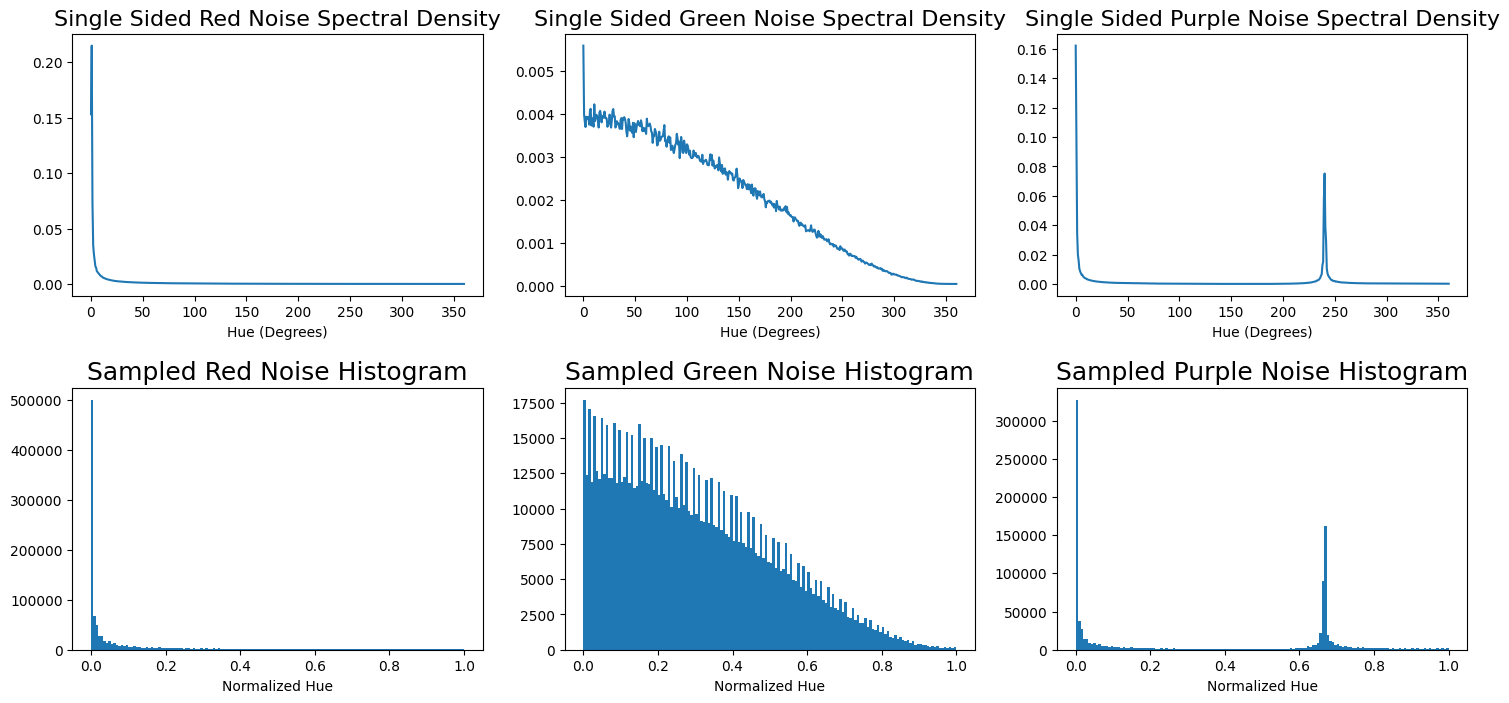

In [129]:
fig, ax = plt.subplots(2, 3, figsize=(18, 8))

half_probs = [half_red_probs, half_green_probs, half_purple_probs]
image_samples = [sampled_red_image, sampled_green_image, sampled_purple_image]

for i in range(3):
    ax[0][i].plot(np.linspace(0, 360, N2), half_probs[i])
    ax[0][i].set_title(f"Single Sided {colors[i]} Noise Spectral Density", size=16)
    ax[0][i].set_xlabel("Hue (Degrees)")

    ax[1][i].hist(image_samples[i].reshape((-1)), bins=150, density=False)
    ax[1][i].set_title(f"Sampled {colors[i]} Noise Histogram", size=18);
    ax[1][i].set_xlabel("Normalized Hue")


fig.subplots_adjust(hspace=0.35);

Sample NxN arrays from each noise color's Single Sided Power Spectral Density

In [75]:
import colorsys

get_rgb = np.vectorize(lambda x: colorsys.hsv_to_rgb(x, 1, 1))

In [76]:
red_noise_image = np.dstack(get_rgb(sampled_red_image))
green_noise_image = np.dstack(get_rgb(sampled_green_image))
purple_noise_image = np.dstack(get_rgb(sampled_purple_image))

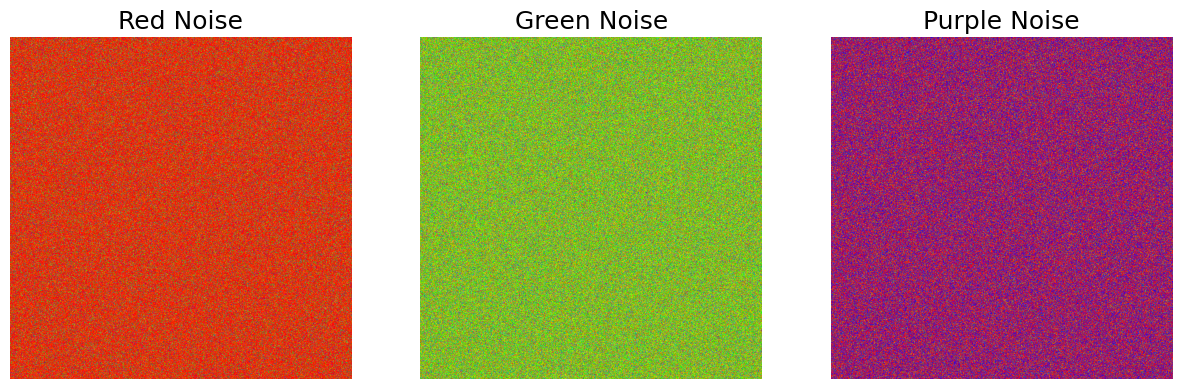

In [77]:
_, ax = plt.subplots(1, 3, figsize=(15, 10))
ax[0].imshow(red_noise_image)
ax[0].set_title('Red Noise', size=18)
ax[0].axis("off")

ax[1].imshow(green_noise_image)
ax[1].set_title('Green Noise', size=18)
ax[1].axis("off");

ax[2].imshow(purple_noise_image)
ax[2].set_title('Purple Noise', size=18)
ax[2].axis("off");

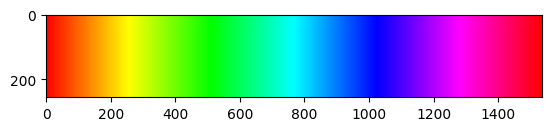

In [125]:
a= np.zeros([256,256*6, 3], dtype=np.uint8) # init the array
# fill the array with rgb values to create the spectrum without the use of loops

#red
a[:,:,0] = np.concatenate(([255]*256, np.linspace(255,0,256), [0]*256, [0]*256, np.linspace(0,255,256), [255]*256))

#green
a[:,:,1] = np.concatenate((np.linspace(0,255,256), [255]*256, [255]*256, np.linspace(255,0,256), [0]*256,[0]*256))

#blue
a[:,:,2] = np.concatenate(([0]*256, [0]*256,np.linspace(0,255,256),[255]*256, [255]*256, np.linspace(255,0,256)))


plt.imshow(a) 

## **References**

https://www.lifewire.com/what-is-hsv-in-design-1078068 
<br>
https://dsp.stackexchange.com/questions/71161/difference-between-double-sided-and-single-sided-awgn-noise-after-bandpass-filte